In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import construct_dataframe


def split_rows_by_list(df, column_name):
    df = df.copy()  # Create a copy of the original dataframe
    df[column_name] = df[column_name].apply(lambda x: x if isinstance(x, list) else [x])
    df = df.explode(column_name)
    return df

def plot_item_frequencies(df, column_name):
    item_counts = df[column_name].value_counts()
    item_counts.index = item_counts.index.str.replace('_', ' ')

    # Set up plot style
    sns.set(style='whitegrid')
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create horizontal bar plot
    ax = sns.barplot(x=item_counts.values, y=item_counts.index, palette='viridis', ax=ax)

    # Add labels and title
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('defect type', fontsize=12)
    plt.title('Defect Frequency Per Category', fontsize=14)

    # Add data labels
    for i, v in enumerate(item_counts.values):
        ax.text(v + 5, i, str(v), color='black', fontsize=10, va='center')

    # Adjust layout and display plot
    plt.tight_layout()
    plt.show()


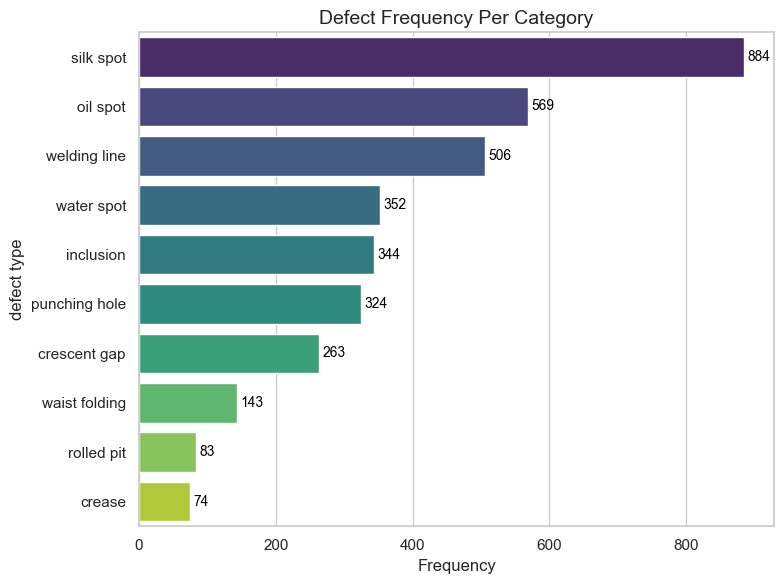

In [53]:
df = construct_dataframe()
dataframe_to_construct_plot = split_rows_by_list(df,'defect_types')
plot_item_frequencies(dataframe_to_construct_plot,'defect_types')

#### Class Imbalances 

as we can see, the dataset indicates significant imbalances , going through with the training might cause overfitting to the classes with
higher presence in the dataset   

to solve the issue of imbalances there's a couple of vaiable approaches such as torch.utils.data.WeightedRandomSampler , 
from torch.utils.data import WeightedRandomSampler

# Performing image augmentation (resizing)

In [1]:
imgpath = './yolo_dataset/train/images/img_01_3402617700_00001.jpg'

import torch
import albumentations

from PIL import Image
import numpy as np 

import torchvision.transforms as transforms


def transform_image_and_bbs(img_arr, bboxes, h, w):
    """
    :param img_arr: original image as a numpy array
    :param bboxes: bboxes as numpy array where each row is 'x_min', 'y_min', 'x_max', 'y_max', "class_id"
    :param h: resized height dimension of image
    :param w: resized weight dimension of image
    :return: dictionary containing {image:transformed, bboxes:['x_min', 'y_min', 'x_max', 'y_max', "class_id"]}
    """
    # create resize transform pipeline
    transform = albumentations.Compose(
        [albumentations.Resize(height=h, width=w, always_apply=True)],
        bbox_params=albumentations.BboxParams(format='pascal_voc'))

    transformed = transform(image=img_arr, bboxes=bboxes)

    return transformed

# Read the image using Pillow (PIL)
image = Image.open(imgpath)
tensor_image =  transforms.ToTensor()(image).squeeze()

# Print the shape of the tensor image
xmin = 1750
ymin = 800
xmax = 1950
ymax = 1000
class_id=2
visualize_data(image_label_tuple=(tensor_image,[[class_id,xmin,ymin,xmax,ymax]]))

FileNotFoundError: [Errno 2] No such file or directory: './yolo_dataset/train/images/img_01_3402617700_00001.jpg'

In [66]:

# Read the image using PIL
image = Image.open(imgpath)
# Convert PIL image to NumPy array
numpy_array = np.array(image)
# Print the shape of the NumPy array
print(numpy_array.shape)

width,height = 2048, 1000
np_img = np.array(image)
transformed =transform_image_and_bbs(np_img,np.array([[xmin,ymin,xmax,ymax,class_id]]),640,640)

              2 | (546.875,512.0) | (609.375,640.0)


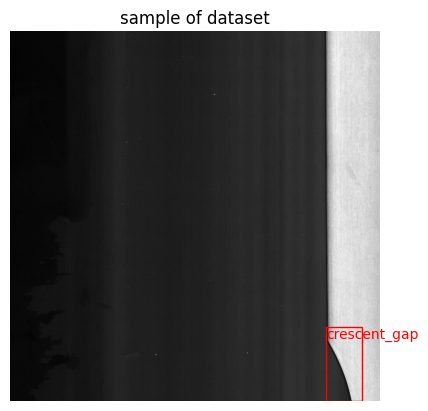

In [69]:
#resized image
bboxes=[bboxes[0][-1],bboxes[0][0],bboxes[0][1],bboxes[0][2],bboxes[0][3]]
tensor = torch.from_numpy(img)
visualize_data(image_label_tuple=(tensor,[bboxes]))